### Homework 8
### Multiple Regression

### Using the house_pricing.csv data, we are going to create a regression but it is going to use categorical variables in addition to numeric to predict home price.

In [138]:
from IPython.display import display, HTML

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

# Importing Sklean libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics


#Import the data
df = pd.read_csv('house_pricing.csv')

df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### Zip code should not be numeric, it is clearly a categorical variable.  Zip code values cannot be multiplied by some value to predict home prices.  Year renovated is zero if it has not been renovated.  It is unlikely that we have a linear relationship between year zero and year 1991 that explains home prices.  Latitude and Longitude have a relationship to prices because neighborhoods are related to prices.  However, there is no linear relationship.  Homes farther north do not always correlate with higher/lower prices.  

In [139]:
#We don't care about id or date columns :
df.drop(['id','date'], axis=1, inplace=True)

# Let's look at the types and values we have :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [140]:
#Unique values in the data
# Note there are duplicate homes with ids... we'll chose to ignore those
df.nunique()

price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

### Make zipcode into a categorical variable.  Use pandas cut to make latitude and longitude into categorical variables.  Create 50 different categories for latitude and 50 for longitude. 

<AxesSubplot:xlabel='long', ylabel='lat'>

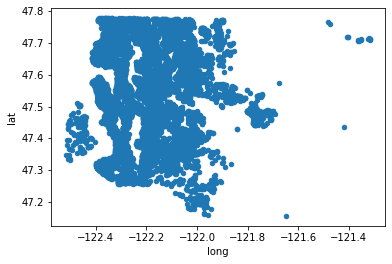

In [141]:
df.plot.scatter(x='long',y='lat')

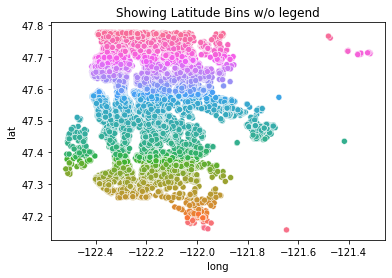

In [142]:
# Creating Bins for Latitude
df['lat_bins'] = pd.cut(df['lat'], 50)
sns.scatterplot(x='long',y='lat', hue='lat_bins', data=df)
plt.legend([],[], frameon=False)
plt.title("Showing Latitude Bins w/o legend")
plt.show()

In [143]:
# Displaying that the lat bins are now 50 fields
df['lat_bins'].unique()

[(47.504, 47.516], (47.715, 47.728], (47.728, 47.74], (47.516, 47.529], (47.616, 47.628], ..., (47.168, 47.181], (47.231, 47.243], (47.243, 47.255], (47.218, 47.231], (47.155, 47.168]]
Length: 50
Categories (50, interval[float64, right]): [(47.155, 47.168] < (47.168, 47.181] < (47.181, 47.193] < (47.193, 47.206] ... (47.728, 47.74] < (47.74, 47.753] < (47.753, 47.765] < (47.765, 47.778]]

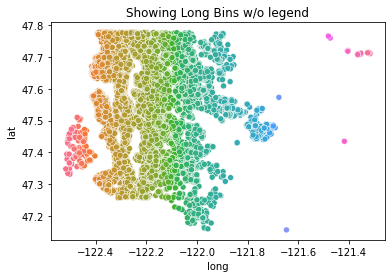

In [144]:
# Creating Bins for Latitude
df['long_bins'] = pd.cut(df['long'], 50)
sns.scatterplot(x='long',y='lat', hue='long_bins', data=df)
plt.legend([],[], frameon=False)
plt.title("Showing Long Bins w/o legend")
plt.show()

In [145]:
# Dropping lat long, renaming lat long bins
df.drop(columns=['lat', 'long'], inplace=True)
df.rename(columns={'lat_bins':'lat', 'long_bins':'long'}, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,"(47.504, 47.516]","(-122.278, -122.254]"
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,"(47.715, 47.728]","(-122.326, -122.302]"
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,"(47.728, 47.74]","(-122.254, -122.23]"
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,"(47.516, 47.529]","(-122.399, -122.375]"
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,"(47.616, 47.628]","(-122.061, -122.037]"


In [146]:
# Turning the Zip Codes in to categorical variables
df['zipcode'] = df['zipcode'].astype('category')


In [147]:
# Turning the Waterfront in to categorical variables... There are only two options, yes/no... which is a category
df['waterfront'] = df['waterfront'].astype('category')

In [148]:
# Turning the yr renovated into a categorical variable
reno_flg = []
for row in df['yr_renovated']:
    if row == 0:
        reno_flg.append(0)    
    else:
        reno_flg.append(1)
df['reno_flg'] = reno_flg
df['reno_flg'] = df['reno_flg'].astype('category')

In [149]:
# Dropping yr renovated as we have now turned it into a categorical variable
df.drop(columns=['yr_renovated'], inplace=True)

In [150]:
# Creating a categorical variable for basement. Yes/No Flag
basement_flg = []
for row in df['sqft_basement']:
    if row == 0:
        basement_flg.append(0)    
    else:
        basement_flg.append(1)
df['basement_flg'] = basement_flg
df['basement_flg'] = df['basement_flg'].astype('category')

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          21613 non-null  float64 
 1   bedrooms       21613 non-null  int64   
 2   bathrooms      21613 non-null  float64 
 3   sqft_living    21613 non-null  int64   
 4   sqft_lot       21613 non-null  int64   
 5   floors         21613 non-null  float64 
 6   waterfront     21613 non-null  category
 7   view           21613 non-null  int64   
 8   condition      21613 non-null  int64   
 9   grade          21613 non-null  int64   
 10  sqft_above     21613 non-null  int64   
 11  sqft_basement  21613 non-null  int64   
 12  yr_built       21613 non-null  int64   
 13  zipcode        21613 non-null  category
 14  sqft_living15  21613 non-null  int64   
 15  sqft_lot15     21613 non-null  int64   
 16  lat            21613 non-null  category
 17  long           21613 non-null  

In [152]:
# Numeric columns: Selecting the Numeric Columns
numFeatures = df.select_dtypes(include=['int64', 'float64']).drop(['price'], axis=1).columns
display("Numeric features: ",numFeatures,"\n\n")

#Categorical columns :
catFeatures = df.select_dtypes(include=['category']).columns
display(catFeatures)

'Numeric features: '

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

'\n\n'

Index(['waterfront', 'zipcode', 'lat', 'long', 'reno_flg', 'basement_flg'], dtype='object')

In [153]:
# Showing the Standard Scaler. 
temp = StandardScaler().fit_transform(df[numFeatures].values)
temp = pd.DataFrame(temp, index=df.index, columns=[numFeatures])
temp.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,-1.254167e-15,-1.051951e-15,3.174253e-16,3.281921e-17,-1.753125e-14,1.853096e-15,-2.636807e-15,-2.328998e-15,3.892022e-16,-2.022801e-15,3.592925e-15,-1.506632e-16,1.235382e-16
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-3.624404e+00,-2.745920e+00,-1.948891e+00,-3.521759e-01,-9.154270e-01,-3.057595e-01,-3.702668e+00,-5.663344e+00,-1.809494e+00,-6.586810e-01,-2.417383e+00,-2.316325e+00,-4.438052e-01
25%,-3.987371e-01,-4.736214e-01,-7.108948e-01,-2.430487e-01,-9.154270e-01,-3.057595e-01,-6.291869e-01,-5.588357e-01,-7.226314e-01,-6.586810e-01,-6.810785e-01,-7.244971e-01,-2.808593e-01
50%,-3.987371e-01,1.756067e-01,-1.849914e-01,-1.808075e-01,1.053939e-02,-3.057595e-01,-6.291869e-01,-5.588357e-01,-2.758102e-01,-6.586810e-01,1.360059e-01,-2.138280e-01,-1.885636e-01
75%,6.764851e-01,5.002207e-01,5.118578e-01,-1.066880e-01,9.365058e-01,-3.057595e-01,9.075535e-01,2.919156e-01,5.091458e-01,6.066704e-01,8.849999e-01,5.448802e-01,-9.835556e-02
max,3.185793e+01,7.641730e+00,1.247807e+01,3.950434e+01,3.714405e+00,4.914129e+00,2.444294e+00,4.545672e+00,9.204044e+00,1.023238e+01,1.497813e+00,6.162239e+00,3.144029e+01


In [154]:
# Setting up a pipeline to transform our our numeric data
numTransformer = Pipeline(steps=[('scaler', StandardScaler())])

# Setting up pipeline for categorical data
catTransformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [155]:
#You may use the adjustedR2 function we used in class :
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

# Create a dataframe to store all of our metrics for the models
evaluation = pd.DataFrame({'Model': [],
                           'Root Mean Squared Error (RMSE)': [],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)': [],
                           'R-squared (test)': [],
                           'Adjusted R-squared (test)': []})

### Predict home prices using just the zip code.  Calculate R^2

In [156]:
# Creating a dependant variable
target = 'price'

# Splitting the data up into X Y
X_all = df.loc[:, df.columns == 'zipcode']
Y_all = df.loc[:, df.columns == target]

# Splitting and training the data
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.3, random_state=42)

#Categorical columns :
catFeatures = X_all.select_dtypes(include=['category']).columns

# Creating a preprocessor for this scenario
preprocessor_zips = ColumnTransformer(transformers=[('cat', catTransformer, catFeatures)])

# Creating the pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor_zips)
                      ,('classifier', LinearRegression())])

# Fitting the training data to the pipeline
pipe.fit(X_train, Y_train)                      


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['zipcode'], dtype='object'))])),
                ('classifier', LinearRegression())])

In [157]:
# Printing the accuracy of the test
print("The training score was:", round(pipe.score(X_train, Y_train)*100,2))
print("The testing score was:", round(pipe.score(X_test, Y_test)*100,2))

The training score was: 41.08
The testing score was: 39.67


In [158]:
#Let's calculate the Root Mean Squared Error on the test data
pred1 = pipe.predict(X_test)

# Calculating the RMSE
rmse1 = float(format(np.sqrt(metrics.mean_squared_error(Y_test, pred1)),'.3f'))

# Calculating R-squared value for the training data set :
rtr1 = float(format(pipe.score(X_train, Y_train),'.3f'))

# Calculating the adjusted R-squared value for the training data set :
artr1 = float(format(adjustedR2(pipe.score(X_train,Y_train), X_train.shape[0],1),'.3f'))

# Calculating the R-squared value for the test data set :
rte1 = float(format(pipe.score(X_test,Y_test),'.3f'))

# Calculating the adjusted R-squared value for the test data set :
arte1 = float(format(adjustedR2(pipe.score(X_test,Y_test), X_test.shape[0],1),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Pipeline Linear Model on only Categorical Zipcode',rmse1, rtr1, artr1, rte1, arte1]
evaluation.sort_values(by = 'R-squared (test)', ascending=False)


,Model,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,Pipeline Linear Model on only Categorical Zipcode,295126.508,0.411,0.411,0.397,0.397


### Predict home prices using just the latitude and longitude categories.  Calculate R^2

In [159]:
# Creating a dependant variable
target = 'price'

# Splitting the data up into X Y
X_all2 = df[['lat', 'long']]
Y_all2 = df.loc[:, df.columns == target]

# Splitting and training the data
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_all2, Y_all2, test_size=0.3, random_state=42)

#Categorical columns :
catFeatures2 = X_all2.select_dtypes(include=['category']).columns

# Creating a preprocessor for this scenario
preprocessor_latlong = ColumnTransformer(transformers=[('cat', catTransformer, catFeatures2)])

# Creating the pipeline
pipe2 = Pipeline(steps=[('preprocessor', preprocessor_latlong)
                      , ('classifier', LinearRegression())])

# Fitting the training data to the pipeline
pipe2.fit(X_train2, Y_train2)          

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['lat', 'long'], dtype='object'))])),
                ('classifier', LinearRegression())])

In [160]:
# Printing the accuracy of the test
print("The training score was:", round(pipe2.score(X_train2, Y_train2)*100,2))
print("The testing score was:", round(pipe2.score(X_test2, Y_test2)*100,2))

The training score was: 30.27
The testing score was: 28.92


In [161]:
#Let's calculate the Root Mean Squared Error on the test data
pred2 = pipe2.predict(X_test2)

# Calculating the RMSE
rmse2 = float(format(np.sqrt(metrics.mean_squared_error(Y_test2, pred2)),'.3f'))

# Calculating R-squared value for the training data set :
rtr2 = float(format(pipe2.score(X_train2, Y_train2),'.3f'))

# Calculating the adjusted R-squared value for the training data set :
artr2 = float(format(adjustedR2(pipe2.score(X_train2,Y_train2), X_train2.shape[0],2),'.3f'))

# Calculating the R-squared value for the test data set :
rte2 = float(format(pipe2.score(X_test2,Y_test2),'.3f'))

# Calculating the adjusted R-squared value for the test data set :
arte2 = float(format(adjustedR2(pipe2.score(X_test2,Y_test2), X_test2.shape[0],2),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Pipeline Linear Model on only Categorical Lat and long',rmse2, rtr2, artr2, rte2, arte2]
evaluation.sort_values(by = 'R-squared (test)', ascending=False)

,Model,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,Pipeline Linear Model on only Categorical Zipcode,295126.508,0.411,0.411,0.397,0.397
1,Pipeline Linear Model on only Categorical Lat ...,320326.129,0.303,0.303,0.289,0.289


### Predict home prices using all variables (categorical zip, lat and lon, not float).  Calculate R^2

In [162]:
# Creating a dependant variable
target = 'price'

# Numeric columns: Selecting the Numeric Columns
numFeatures3 = df.select_dtypes(include=['int64', 'float64']).drop(['price'], axis=1).columns

#Categorical columns :
catFeatures3 = df.select_dtypes(include=['category']).columns

# Splitting the data up into X Y
X_all3 = df.loc[:, df.columns != target]
Y_all3 = df.loc[:, df.columns == target]

# Splitting and training the data
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_all3, Y_all3, test_size=0.3, random_state=42)

# Creating a preprocessor for this scenario
preprocessor_all = ColumnTransformer(
    transformers=[
        ('num', numTransformer, numFeatures3),
        ('cat', catTransformer, catFeatures3)])

# Creating the pipeline
pipe3 = Pipeline(steps=[('preprocessor', preprocessor_all)
                      , ('classifier', LinearRegression())])

# Fitting the training data to the pipeline
pipe3.fit(X_train3, Y_train3)       

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['waterfront', 'zipcode', 'lat', 'long', 'reno_flg', 'basement_flg'], dtype='object'))])),
                ('classifier', LinearRegression())])

In [163]:
# Printing the accuracy of the test
print("The training score was:", round(pipe3.score(X_train3, Y_train3)*100,2))
print("The testing score was:", round(pipe3.score(X_test3, Y_test3)*100,2))

The training score was: 81.6
The testing score was: 81.27


In [164]:
#Let's calculate the Root Mean Squared Error on the test data
pred3 = pipe3.predict(X_test3)

# Calculating the RMSE
rmse3 = float(format(np.sqrt(metrics.mean_squared_error(Y_test3, pred3)),'.3f'))

# Calculating R-squared value for the training data set :
rtr3 = float(format(pipe3.score(X_train3, Y_train3),'.3f'))

# Calculating the adjusted R-squared value for the training data set :
artr3 = float(format(adjustedR2(pipe3.score(X_train3, Y_train3), X_train3.shape[0],len(df.columns)-1),'.3f'))

# Calculating the R-squared value for the test data set :
rte3 = float(format(pipe3.score(X_test3, Y_test3),'.3f'))

# Calculating the adjusted R-squared value for the test data set :
arte3 = float(format(adjustedR2(pipe3.score(X_test3, Y_test3), X_test3.shape[0],len(df.columns)-1),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Pipeline Linear Model with all variables, zip+lon+lat as cat',rmse3, rtr3, artr3, rte3, arte3]
evaluation.sort_values(by = 'R-squared (test)', ascending=False)

,Model,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
2,"Pipeline Linear Model with all variables, zip+...",164416.644,0.816,0.816,0.813,0.812
0,Pipeline Linear Model on only Categorical Zipcode,295126.508,0.411,0.411,0.397,0.397
1,Pipeline Linear Model on only Categorical Lat ...,320326.129,0.303,0.303,0.289,0.289


### Looking at just lat, lon, bedrooms, sqft_living and zip code, use backward elimination to find the best model.  Calculate R^2

In [165]:
# First setting up the dataframe to only include the variables
# I for some unfortunate reason have decided to do this manually. Using a backward stepwise model in R would be nice
cols_2_use = ['price', 'lat', 'long', 'bedrooms', 'sqft_living', 'zipcode']
df_4 = df[cols_2_use].copy()
df_4

,price,lat,long,bedrooms,sqft_living,zipcode
0,221900.0,"(47.504, 47.516]","(-122.278, -122.254]",3,1180,98178
1,538000.0,"(47.715, 47.728]","(-122.326, -122.302]",3,2570,98125
2,180000.0,"(47.728, 47.74]","(-122.254, -122.23]",2,770,98028
3,604000.0,"(47.516, 47.529]","(-122.399, -122.375]",4,1960,98136
4,510000.0,"(47.616, 47.628]","(-122.061, -122.037]",3,1680,98074
...,...,...,...,...,...,...
21608,360000.0,"(47.691, 47.703]","(-122.35, -122.326]",3,1530,98103
21609,400000.0,"(47.504, 47.516]","(-122.375, -122.35]",4,2310,98146
21610,402101.0,"(47.591, 47.604]","(-122.302, -122.278]",2,1020,98144
21611,400000.0,"(47.529, 47.541]","(-122.086, -122.061]",3,1600,98027


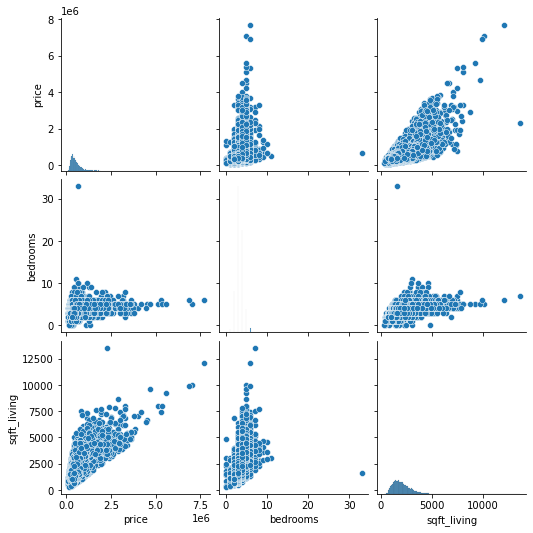

In [166]:
# Taking a sneak peak at the pair plot
sns.pairplot(df_4)
plt.show()

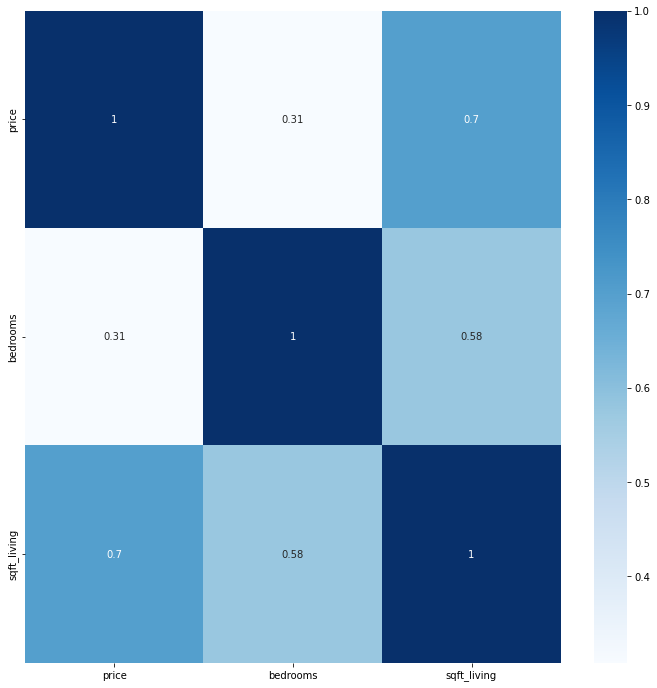

In [167]:
# Looking at a correlation plot 
plt.figure(figsize=(12,12))
sns.heatmap(df_4.corr().abs(), cmap="Blues", annot=True)
plt.show()

In [168]:
# Create a dataframe to store all of our metrics for the models
backstep_eval = pd.DataFrame({'Model': [],
                           'Root Mean Squared Error (RMSE)': [],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)': [],
                           'R-squared (test)': [],
                           'Adjusted R-squared (test)': []})

In [169]:
def spin_it(df, cols_2_use, backstep_eval):
    """This function runs through and process, pipelines, and stores linear regression in back step val"""
    
    # Creating a list of the variables used for the backstep eval
    label = ','.join(cols_2_use)
    df_eval = df[cols_2_use].copy()
    
    # Creating a dependant variable
    target = 'price'


    # Numeric columns: Selecting the Numeric Columns
    numFeatures_eval = df_eval.select_dtypes(include=['int64', 'float64']).drop(['price'], axis=1).columns

    #Categorical columns :
    catFeatures_eval = df_eval.select_dtypes(include=['category']).columns

    # Splitting the data up into X Y
    X_all_eval = df_eval.loc[:, df_eval.columns != target]
    Y_all_eval = df_eval.loc[:, df_eval.columns == target]

    # Splitting and training the data
    X_train_eval, X_test_eval, Y_train_eval, Y_test_eval = train_test_split(X_all_eval, Y_all_eval, test_size=0.3, random_state=42)

    # Creating a preprocessor for this scenario
    preprocessor_eval = ColumnTransformer(
        transformers=[
            ('num', numTransformer, numFeatures_eval),
            ('cat', catTransformer, catFeatures_eval)])

    # Creating the pipeline
    pipe_eval = Pipeline(steps=[('preprocessor', preprocessor_eval)
                      , ('classifier', LinearRegression())])

    # Fitting the training data to the pipeline
    pipe_eval.fit(X_train_eval, Y_train_eval)  

    # Printing the accuracy of the test
    print("The training score was:", round(pipe_eval.score(X_train_eval, Y_train_eval)*100,2))
    print("The testing score was:", round(pipe_eval.score(X_test_eval, Y_test_eval)*100,2))

    #Let's calculate the Root Mean Squared Error on the test data
    pred_eval = pipe_eval.predict(X_test_eval)

    # Calculating the RMSE
    rmse_eval = float(format(np.sqrt(metrics.mean_squared_error(Y_test_eval, pred_eval)),'.3f'))

    # Calculating R-squared value for the training data set :
    rtr_eval = float(format(pipe_eval.score(X_train_eval, Y_train_eval),'.3f'))

    # Calculating the adjusted R-squared value for the training data set :
    artr_eval = float(format(adjustedR2(pipe_eval.score(X_train_eval, Y_train_eval), X_train_eval.shape[0],len(df_eval.columns)-1),'.3f'))

    # Calculating the R-squared value for the test data set :
    rte_eval = float(format(pipe_eval.score(X_test_eval, Y_test_eval),'.3f'))

    # Calculating the adjusted R-squared value for the test data set :
    arte_eval = float(format(adjustedR2(pipe_eval.score(X_test_eval, Y_test_eval), X_test_eval.shape[0],len(df_eval.columns)-1),'.3f'))

    r = backstep_eval.shape[0]
    backstep_eval.loc[r] = [label, rmse_eval, rtr_eval, artr_eval, rte_eval, arte_eval]
    backstep_eval.sort_values(by = 'R-squared (test)', ascending=False)
    display(backstep_eval)

    return backstep_eval


In [170]:
# Starint with model 1 including the variables that we want
cols_2_use = ['price', 'lat', 'long', 'bedrooms', 'sqft_living', 'zipcode']
eval_fill = spin_it(df, cols_2_use, backstep_eval)


The training score was: 75.14
The testing score was: 74.17


,Model,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,"price,lat,long,bedrooms,sqft_living,zipcode",193096.723,0.751,0.751,0.742,0.742


I am choosing to look at removing Bedrooms first, because it has the lowest correlation with price

In [171]:
# Starint with model 2 removing bedrooms
cols_2_use = ['price', 'lat', 'long', 'sqft_living', 'zipcode']
eval_full = spin_it(df, cols_2_use, eval_fill)


The training score was: 74.37
The testing score was: 73.43


,Model,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,"price,lat,long,bedrooms,sqft_living,zipcode",193096.723,0.751,0.751,0.742,0.742
1,"price,lat,long,sqft_living,zipcode",195866.505,0.744,0.744,0.734,0.734


In [172]:
# Starint with model 2 removing zipcode
# cols_2_use = ['price', 'lat', 'long', 'bedrooms', 'sqft_living', 'zipcode']
cols_2_use = ['price', 'lat', 'long', 'bedrooms', 'sqft_living']
eval_full = spin_it(df, cols_2_use, eval_fill)

The training score was: 69.74
The testing score was: 68.62


,Model,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,"price,lat,long,bedrooms,sqft_living,zipcode",193096.723,0.751,0.751,0.742,0.742
1,"price,lat,long,sqft_living,zipcode",195866.505,0.744,0.744,0.734,0.734
2,"price,lat,long,bedrooms,sqft_living",212852.677,0.697,0.697,0.686,0.686


In [173]:
# Starint with model 2 removing sqft living
# cols_2_use = ['price', 'lat', 'long', 'bedrooms', 'sqft_living', 'zipcode']
cols_2_use = ['price', 'lat', 'long', 'bedrooms', 'zipcode']
eval_full = spin_it(df, cols_2_use, eval_fill)

The training score was: 49.46
The testing score was: 48.39


,Model,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,"price,lat,long,bedrooms,sqft_living,zipcode",193096.723,0.751,0.751,0.742,0.742
1,"price,lat,long,sqft_living,zipcode",195866.505,0.744,0.744,0.734,0.734
2,"price,lat,long,bedrooms,sqft_living",212852.677,0.697,0.697,0.686,0.686
3,"price,lat,long,bedrooms,zipcode",272966.149,0.495,0.494,0.484,0.484


In [174]:
# Starint with model 2 removing long
# cols_2_use = ['price', 'lat', 'long', 'bedrooms', 'sqft_living', 'zipcode']
cols_2_use = ['price', 'lat', 'bedrooms', 'sqft_living', 'zipcode']
eval_full = spin_it(df, cols_2_use, eval_fill)

The training score was: 74.54
The testing score was: 73.58


,Model,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,"price,lat,long,bedrooms,sqft_living,zipcode",193096.723,0.751,0.751,0.742,0.742
1,"price,lat,long,sqft_living,zipcode",195866.505,0.744,0.744,0.734,0.734
2,"price,lat,long,bedrooms,sqft_living",212852.677,0.697,0.697,0.686,0.686
3,"price,lat,long,bedrooms,zipcode",272966.149,0.495,0.494,0.484,0.484
4,"price,lat,bedrooms,sqft_living,zipcode",195305.333,0.745,0.745,0.736,0.736


In [175]:
# Starint with model 2 removing lat
# cols_2_use = ['price', 'lat', 'long', 'bedrooms', 'sqft_living', 'zipcode']
cols_2_use = ['price', 'long', 'bedrooms', 'sqft_living', 'zipcode']
eval_full = spin_it(df, cols_2_use, eval_fill)

The training score was: 74.67
The testing score was: 73.9


,Model,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,"price,lat,long,bedrooms,sqft_living,zipcode",193096.723,0.751,0.751,0.742,0.742
1,"price,lat,long,sqft_living,zipcode",195866.505,0.744,0.744,0.734,0.734
2,"price,lat,long,bedrooms,sqft_living",212852.677,0.697,0.697,0.686,0.686
3,"price,lat,long,bedrooms,zipcode",272966.149,0.495,0.494,0.484,0.484
4,"price,lat,bedrooms,sqft_living,zipcode",195305.333,0.745,0.745,0.736,0.736
5,"price,long,bedrooms,sqft_living,zipcode",194095.618,0.747,0.747,0.739,0.739


Techincally we did not improve the model at all by removing variables. This means that we can stop here and say that the full model was the best.